Инициализация библиотек для ETL и EDA, а также для кластеризации

In [165]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import skew, norm
import scipy.stats as stats
from scipy.stats import norm
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings(action="ignore")

Загрузка данных и вывод первых пяти строк

In [166]:
data = pd.read_csv('data_3.csv')
df = data.copy()
df.head()

,Unnamed: 0.1,Unnamed: 0,price,rooms,area,kitchen_area,floor,renovation,deal_type,balcony,...,years_in_ownership,number_of_owners,energy_efficiency_class,power_supply,number_of_elevators,ventilation,freight_elevator,gas_supply,latitude,longitude
0,0,0,4500000,1.0,22.6,3.0,3.0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.122565,131.907848
1,1,1,10000000,3.0,75.4,5.0,6.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.118957,131.968481
2,2,2,6650000,1.0,31.6,5.0,2.0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.183735,131.925201
3,3,3,11000000,2.0,47.0,3.1,6.0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.086209,131.854930
4,4,4,4900000,1.0,24.1,3.0,16.0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.118827,131.970732


Просмотр основной информации по строкам

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.1             120 non-null    int64  
 1   Unnamed: 0               120 non-null    int64  
 2   price                    120 non-null    int64  
 3   rooms                    101 non-null    float64
 4   area                     107 non-null    float64
 5   kitchen_area             89 non-null     float64
 6   floor                    107 non-null    float64
 7   renovation               120 non-null    int64  
 8   deal_type                120 non-null    int64  
 9   balcony                  120 non-null    int64  
 10  trash_chute              83 non-null     float64
 11  Год постройки            107 non-null    float64
 12  Материал стен            117 non-null    object 
 13  Серия дома               43 non-null     object 
 14  Количество этажей        1

Удаление колонок с наибольшим количеством значений NaN и очевидно плохих признаков

In [168]:
too_much_na_columns = ['Жилая', 'number_of_owners', 'Теплоснабжение','number_of_elevators', 'energy_efficiency_class','gas_supply', 'freight_elevator', 'ventilation', 'number_of_owners', 'power_supply', 'Количество подъездов', 'years_in_ownership', 'Водоотведение', 'Водоотведение', 'gas_supply']
df.drop(columns=too_much_na_columns, inplace=True)

columns_to_remove = ['Unnamed: 0', 'Unnamed: 0.1', 'Серия дома']
df.drop(columns=[col for col in columns_to_remove if col in df.columns], inplace=True)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   120 non-null    int64  
 1   rooms                   101 non-null    float64
 2   area                    107 non-null    float64
 3   kitchen_area            89 non-null     float64
 4   floor                   107 non-null    float64
 5   renovation              120 non-null    int64  
 6   deal_type               120 non-null    int64  
 7   balcony                 120 non-null    int64  
 8   trash_chute             83 non-null     float64
 9   Год постройки           107 non-null    float64
 10  Материал стен           117 non-null    object 
 11  Количество этажей       116 non-null    float64
 12  Лифт                    48 non-null     float64
 13  Тип перекрытий          102 non-null    object 
 14  Тип фундамента          57 non-null     ob

Заполнение значений NaN: медианой для числовых данных и модальным значением для категориальных

In [170]:
medians = df.select_dtypes(include='number').median()
df.fillna(value=medians, inplace=True)

modes = df.select_dtypes(include='object').mode().iloc[0]
df.fillna(value=modes, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   120 non-null    int64  
 1   rooms                   120 non-null    float64
 2   area                    120 non-null    float64
 3   kitchen_area            120 non-null    float64
 4   floor                   120 non-null    float64
 5   renovation              120 non-null    int64  
 6   deal_type               120 non-null    int64  
 7   balcony                 120 non-null    int64  
 8   trash_chute             120 non-null    float64
 9   Год постройки           120 non-null    float64
 10  Материал стен           120 non-null    object 
 11  Количество этажей       120 non-null    float64
 12  Лифт                    120 non-null    float64
 13  Тип перекрытий          120 non-null    object 
 14  Тип фундамента          120 non-null    ob

Логарифмирование цены дома

In [171]:
df['price'] = np.log1p(df['price'])

Очистка координат от выборосов

In [172]:
df = df[df['longitude'] > 100]

Создание набора координат

In [173]:
co = {
    'latitude': df['latitude'],
    'longitude': df['longitude']
}

array = pd.DataFrame(co).dropna()
print(array)

      latitude   longitude
0    43.122565  131.907848
1    43.118957  131.968481
2    43.183735  131.925201
3    43.086209  131.854930
4    43.118827  131.970732
..         ...         ...
115  43.232924  132.012663
116  43.075123  131.962042
117  43.092071  131.961957
118  43.112997  131.933747
119  43.125537  131.931541

[119 rows x 2 columns]


Визуализация домов на "карте"

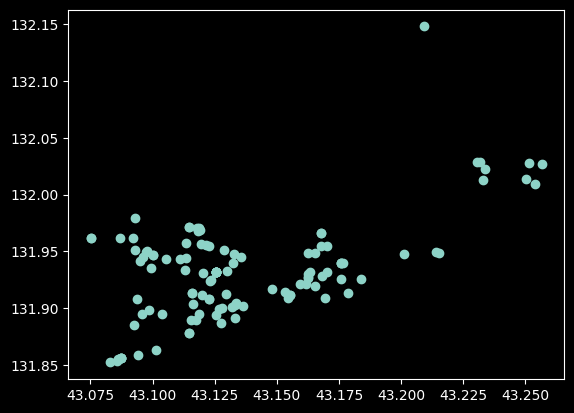

In [174]:
plt.scatter(array['latitude'], array['longitude'], label='True Position')

Инициализация модели кластеризации по к-ближайшим

In [175]:
kmeans = KMeans(n_clusters=7, algorithm='lloyd')
kmeans.fit(array)

KMeans(n_clusters=7)

In [176]:
print(kmeans.cluster_centers_)

[[ 43.17383331 131.93664909]
 [ 43.08890786 131.85636298]
 [ 43.13188112 131.92864165]
 [ 43.24266731 132.02130764]
 [ 43.10429954 131.9564588 ]
 [ 43.11815385 131.89795982]
 [ 43.2092367  132.1481407 ]]


Визуализация кластеров на "карте"

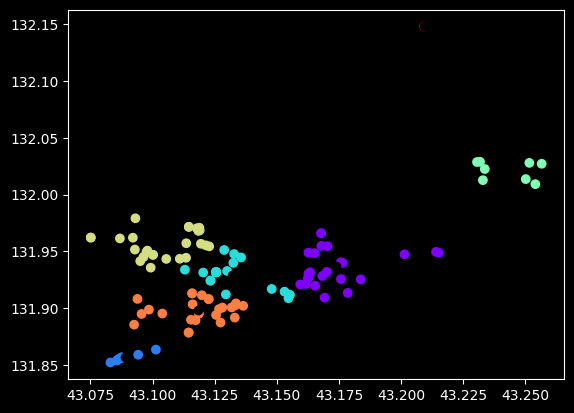

In [177]:
plt.scatter(array['latitude'],array['longitude'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

Добавление колонки, означающая кластер дома

In [178]:
df['cluster'] = kmeans.fit_predict(array)

In [179]:
df['cluster'] = df['cluster'].astype('object')

In [180]:
too_much_na_columns = ['latitude', 'longitude']
df.drop(columns=too_much_na_columns, inplace=True)

Начнем прогнозирование с регрессии случайного леса

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

In [209]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = resample(X_train, y_train, n_samples=len(X_train) * 10, random_state=42)


In [210]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [211]:
rf_model = RandomForestRegressor()

In [212]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_features = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
numerical_features = [feat for feat in numerical_features if feat not in categorical_features]

In [213]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [214]:
rf_param_grid = {
    'model__n_estimators': [20, 50, 100, 200, 300],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [215]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [216]:
rf_search = RandomizedSearchCV(rf_pipeline, rf_param_grid, n_iter=10, cv=3, verbose=1, random_state=42)
rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['rooms',
                                                                                'area',
                                                                                'kitchen_area',
                                                                                'floor',
                                                                                'renovation',
                                                                                'deal_type',
                                                                                'balcony',
                                                                                'trash_chute',
                                                                                'Год '
                                                                                'постройки',
                                                                                'Количество '
                                                                                'этажей',
                                                                                'Лифт',
                                                                                'Количество '
                                                                                'балконов',
                                                                                'Количество '
                                                                                'квартир']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['...
                                                                                'фундамента',
                                                                                'Горячее '
                                                                                'водоснабжение',
                                                                                'Холодное '
                                                                                'водоснабжение',
                                                                                'cluster'])])),
                                             ('model',
                                              RandomForestRegressor())]),
                   param_distributions={'model__max_depth': [None, 10, 20, 30],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [20, 50, 100,
                                                                200, 300]},
                   random_state=42, verbose=1)

In [217]:
print(f'Best parameters for Random Forest: {rf_search.best_params_}')

Best parameters for Random Forest: {'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': 'sqrt', 'model__max_depth': 30}


In [218]:
y_pred_rf = rf_search.predict(X_test)
print(f'Random Forest Validation MSE: {mean_squared_error(y_test, y_pred_rf)}')

Random Forest Validation MSE: 0.038420489393038736


In [219]:
print(f'Random Forest Validation R2: {r2_score(y_test, y_pred_rf)}')

Random Forest Validation R2: 0.7549187443517571


In [193]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [194]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rooms', 'area',
                                                   'kitchen_area', 'floor',
                                                   'renovation', 'deal_type',
                                                   'balcony', 'trash_chute',
                                                   'Год постройки',
                                                   'Количество этажей', 'Лифт',
                                                   'Количество балконов',
                                                   'Количество квартир']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Материал стен',
                                                   'Тип перекрытий',
                                                   'Тип фундамента',
                                                   'Горячее водоснабжение',
                                                   'Холодное водоснабжение',
                                                   'cluster'])])),
                ('model', LinearRegression())])

In [195]:
y_pred = pipeline.predict(X_test)

In [196]:
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Validation MSE: {mse}')

Linear Regression Validation MSE: 0.04248645624084


In [197]:
print(f'Linear Regression Validation R2: {r2_score(y_test, y_pred)}')

Linear Regression Validation R2: 0.7289822642020842
